In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import re

In [4]:
%ls

 Volume in Laufwerk D: hat keine Bezeichnung.
 Volumeseriennummer: C413-AFEB

 Verzeichnis von d:\code\FeatFloWer\Feat_FloWer\applications\q2p1_bench_sedimentation\tools\_data

26.05.2022  10:20    <DIR>          .
26.05.2022  10:20    <DIR>          ..
26.05.2022  10:00            40.960 .prot_ref.txt.swp
26.05.2022  10:00            40.960 .prot_zdiv.txt.swp
26.05.2022  10:00           177.261 BenchValues.txt
26.05.2022  10:00         2.652.917 prot_ref.txt
26.05.2022  10:00         2.652.257 prot_zdiv.txt
26.05.2022  10:00             2.836 q2p1_param.dat
26.05.2022  10:00             2.845 q2p1_param.dat~
26.05.2022  10:20               494 ref_values.ipynb
26.05.2022  10:00             2.537 Statistics.txt
               9 Datei(en),      5.573.067 Bytes
               2 Verzeichnis(se),  9.353.224.192 Bytes frei


In [11]:
with open("prot_zdiv.txt", "r") as f:
    lines = f.readlines()

time = []
vel = []
pos = []
force = []
for line in lines:
    m = re.search("PartVel:", line)
    if m != None:
        splitLine = line.split()
        time.append(splitLine[4])
        vel.append(splitLine[3])
    m = re.search("Position:", line)
    if m != None:
        splitLine = line.split()
        pos.append(splitLine[3])
    m = re.search("ResistanceForce:", line)
    if m != None:
        splitLine = line.split()
        force.append(splitLine[3])
print(time[0])
time = [float(x) for x in time]
print(time[0])
time = [float(x) for x in time]
vel = [float(x) for x in vel]
pos = [float(x) for x in pos]
force = [float(x) for x in force]
print("Length:", len(time), len(vel), len(pos))

1.0000E-03
0.001
Length: 1100 1100 1100


In [8]:
%ls

 Volume in Laufwerk D: hat keine Bezeichnung.
 Volumeseriennummer: C413-AFEB

 Verzeichnis von d:\code\FeatFloWer\Feat_FloWer\applications\q2p1_bench_sedimentation\tools\_data

27.05.2022  19:32    <DIR>          .
27.05.2022  19:32    <DIR>          ..
26.05.2022  10:00            40.960 .prot_ref.txt.swp
26.05.2022  10:00            40.960 .prot_zdiv.txt.swp
26.05.2022  10:00           177.261 BenchValues.txt
27.05.2022  19:32         3.523.659 out.txt
26.05.2022  10:00         2.652.917 prot_ref.txt
26.05.2022  10:00         2.652.257 prot_zdiv.txt
26.05.2022  10:00             2.836 q2p1_param.dat
26.05.2022  10:00             2.845 q2p1_param.dat~
26.05.2022  10:52           112.200 ref_cols.txt
26.05.2022  10:55           112.200 ref_grid.txt
27.05.2022  18:19            22.655 ref_values.ipynb
26.05.2022  10:00             2.537 Statistics.txt
              12 Datei(en),      9.343.287 Bytes
               2 Verzeichnis(se), 11.180.699.648 Bytes frei


In [23]:

with open("out2.txt", "r") as f:
    lines = f.readlines()

timen = []
veln = []
posn = []
for line in lines:
    m = re.search("Velocity:", line)
    if m != None:
        splitLine = line.split()
        timen.append(splitLine[4])
        veln.append(splitLine[3])
    m = re.search("Position:", line)
    if m != None:
        splitLine = line.split()
        posn.append(splitLine[3])
print(time[0])
timen = [float(x) for x in timen]
veln = [float(x) for x in veln]
posn = [float(x) for x in posn]
print("Length:", len(timen), len(veln), len(posn))

0.001
Length: 1100 1100 1100


In [24]:
outData = np.array([time, force, vel, pos])
outData = np.transpose(outData)
np.savetxt('ref_grid.txt', outData)

In [25]:
refData = np.loadtxt("ref_cols.txt")

In [26]:
vel2 = refData[:,2]
time2 = refData[:,0]
print(len(vel2))

1100


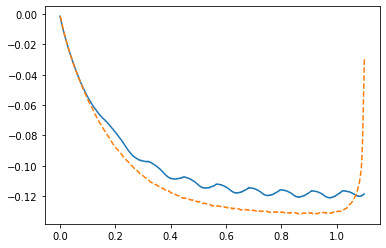

In [27]:
#plt.plot(time, vel)
plt.plot(timen, veln)
plt.plot(time2, vel2, linestyle='dashed')

In [2]:
0.141071 * 9.81


1.38390651

In [5]:
vol = 1.76625e-06
effRho = 158.0
invMass = 505.51
print(1120 - 962)
print(vol * effRho * invMass)   
print(vol * effRho * invMass * 9.81)   

158
0.141071411925
1.38391055098425


In [6]:
5.0 * 1e-3

0.005

In [7]:
1.0 * 1e-2

0.01